# Análise Geográfico por Pontos

Nessa seção será dado destaque para o impacto da localização nas principais features, através de mapas feitos com as coordenadas.

As etapas realizadas foram:
- Importação das bibliotecas e da base
- Análise da distribuição de variáveis categóricas (proximidade do oceano e faixa de renda)
- Análise distribuição de variáveis numéricas (preço das casas  - target)

# Importação das bibliotecas e da Base

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.config import DADOS_LIMPOS
from src.graficos import SCATTER_ALPHA, PALETTE

sns.set_theme(palette='bright', style='white')

In [2]:
df = pd.read_parquet(DADOS_LIMPOS)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17564 non-null  float32
 1   latitude                  17564 non-null  float32
 2   housing_median_age        17564 non-null  int8   
 3   total_rooms               17564 non-null  int16  
 4   total_bedrooms            17564 non-null  int16  
 5   population                17564 non-null  int16  
 6   households                17564 non-null  int16  
 7   median_income             17564 non-null  float32
 8   median_house_value        17564 non-null  int32  
 9   ocean_proximity           17564 non-null  object 
 10  median_income_cat         17564 non-null  int64  
 11  rooms_per_household       17564 non-null  float32
 12  population_per_household  17564 non-null  float32
 13  bedrooms_per_room         17564 non-null  float32
dtypes: flo

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
count,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000
mean,-119.509995,35.602200,27.276873,2510.510875,515.378046,1386.315019,483.979447,3.696602,189570.803803,2.952460,5.253923,2.934664,0.211643
std,1.984251,2.147238,11.323957,1593.977891,320.848886,844.889138,295.559700,1.541926,95971.413796,1.006761,1.134086,0.691409,0.048315
min,-124.300003,32.540001,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,1.714286,0.750000,0.113535
25%,-121.599998,33.919998,18.000000,1464.750000,300.000000,816.000000,287.000000,2.547375,114300.000000,2.000000,4.446466,2.470259,0.176919
50%,-118.459999,34.240002,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,3.000000,5.205450,2.852657,0.203465
75%,-117.980003,37.669998,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622525,243800.000000,4.000000,5.961016,3.306427,0.239151
max,-114.550003,41.950001,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,5.000000,10.352942,5.392954,0.406295


# Análise Distribuição Geográfica

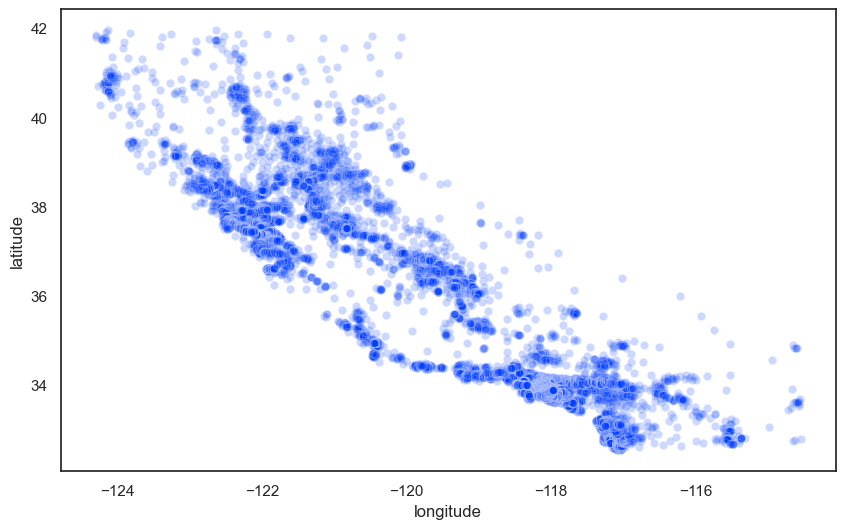

In [4]:
# distribuição dos domicílios da base ao longo do Estado da California
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, alpha=SCATTER_ALPHA)

plt.show()

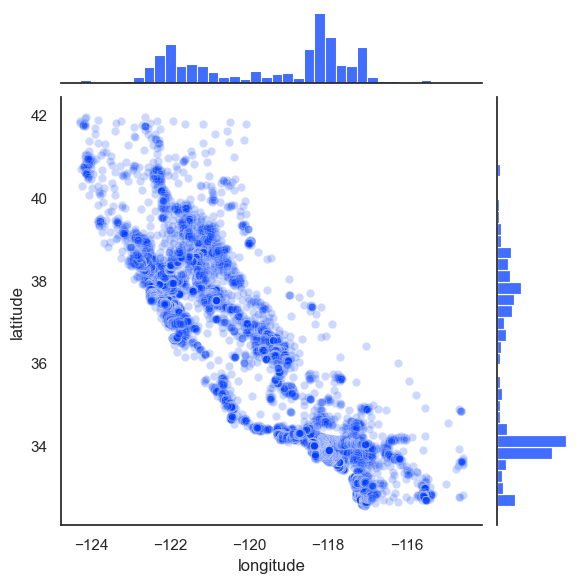

In [5]:
sns.jointplot(data=df, x='longitude', y='latitude', alpha=SCATTER_ALPHA)

plt.show()

## Distribuição variáveis categóricas

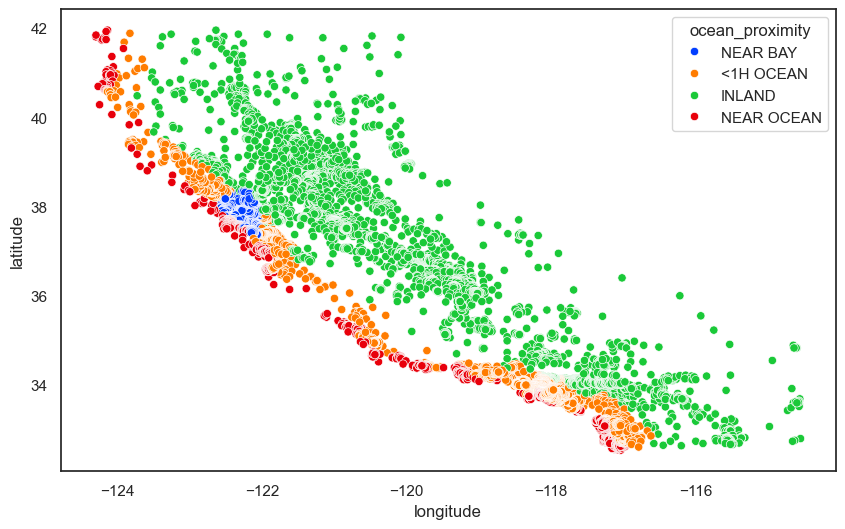

In [6]:
# Segmentação de proximidade do oceano
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='ocean_proximity')

plt.show()

O gráfico acima  mostra como foi segmentada a localização na base, e nosso objetivo será entender justamente a relação dessas categorias com o preço do imóvel

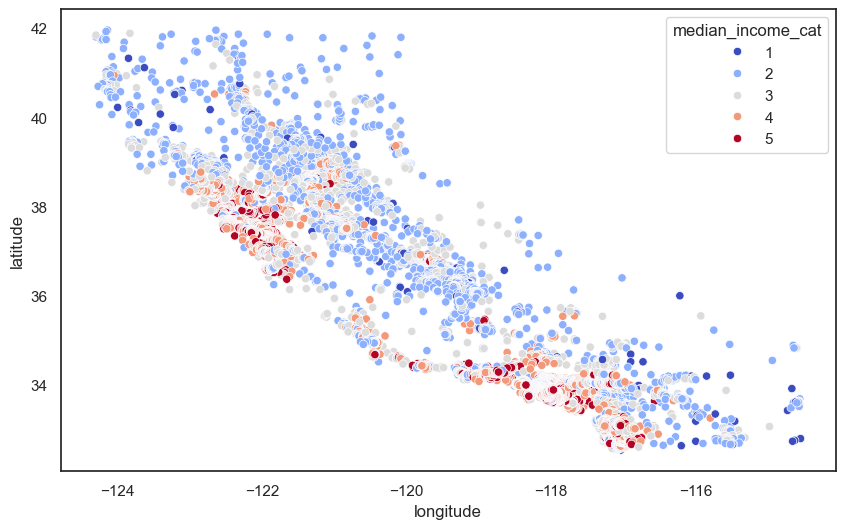

In [7]:
# Renda dos blocos censitários
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='median_income_cat', palette=PALETTE)

plt.show()

No gráfico acima é possível identificar onde são os pontos de maior (Próximo ao oceano e na bahia de São Francisco) e menor renda (interior). Isso terá um impacto no valor das casas, como será possível ver no gráfico a seguir. 

## Distribuição variáveis numéricas

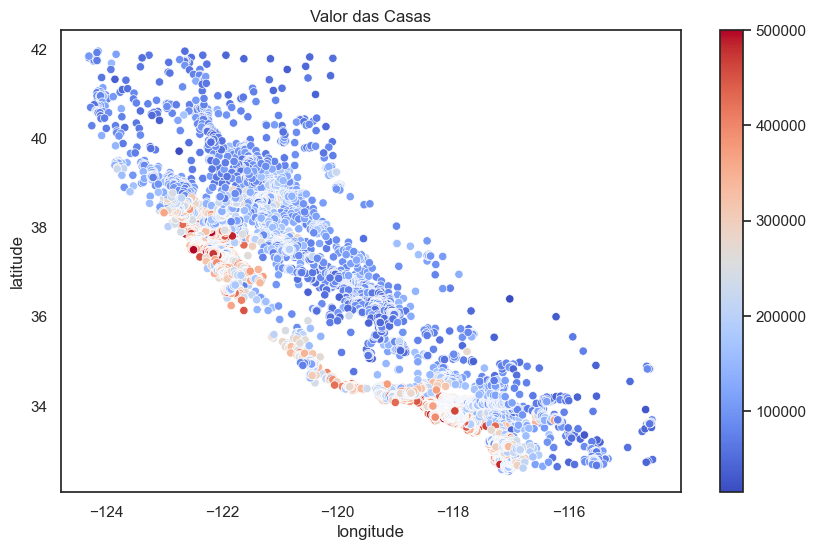

In [9]:
# Preço das casas
fig, ax = plt.subplots(figsize=(10,6))

norm_median_house_value = plt.Normalize(df['median_house_value'].min(), df['median_house_value'].max())

sm_median_house_value = plt.cm.ScalarMappable(norm=norm_median_house_value, cmap=PALETTE)

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='median_house_value', palette=PALETTE)

fig.colorbar(sm_median_house_value, ax=ax)

ax.get_legend().remove()

plt.title('Valor das Casas')

plt.show()

Como observado na EDA, as mesmas regiões em que a renda é maior, temos um valor maior das casas, o que faz sentido (pessoas mais ricas terão casas melhores e em regiões mais estratégicas).


Uma forma mais intuitiva de fazer a análise é por subdivisão do Estado, que seriam os Condados. Para isso é necessário utilizar informações das fronteiras entre cada subdivisão, que é o que será feito no próximo Notebook.